# Scan analysis - shap

In [10]:
%load_ext autoreload
%autoreload 2

# %matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
import pandas as pd

import itertools

from tqdm import tqdm

import seaborn as sns

from math import floor

import pickle


from matplotlib.colors import BoundaryNorm

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable

# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
# import plotly.express as px

from xgboost import XGBRegressor
import shap


from plots2.fns import (
    get_corner_annotations,
    get_corner_annotations_custom_labels
)


from plots2.consts import (
    SMALL_FONT,
    MEDIUM_FONT,
    BIGGER_FONT,
    SHAP_BLUE,
)

from poly2.utils import (
    get_dispersal_kernel, trait_vec, beta_dist, gamma_dist,
    get_dist_var, get_dist_mean, edge_values,
    object_load, object_dump,
)
from poly2.shap import get_shap_values
from poly2.run import no_joblib_single_run, no_joblib_multiple_run
from poly2.config import Config, ConfigMixture, get_asymptote_config
from poly2.simulator import SimulatorOneTrait, SimulatorAsymptote
from poly2.consts import FUNG_DECAY_RATE, MUTATION_PROP, MUTATION_SCALE

# Load SHAP values

In [21]:
fn = './SHAP_Y10.pickle'

shap_values = object_load(fn)

# Fig 5

In [23]:
WIDTH = 8
HEIGHT = 4

## A

Text(0.05, 0.9, 'A')

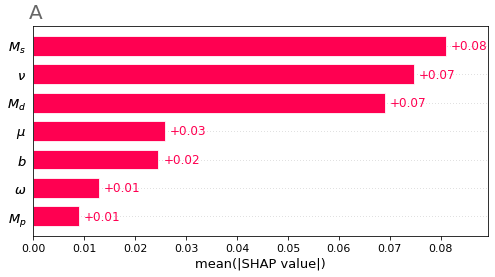

In [26]:
plt.close('all')

shap.plots.bar(shap_values, show=False)

f = plt.gcf()

ax = plt.gca()

f.set_figwidth(WIDTH)
f.set_figheight(HEIGHT)

f.patch.set_facecolor('white')


labels=[
    r'$M_s$',
    # r'$Y$',
    r'$\nu$',
    r'$M_d$',
    r'$\mu$',
    r'$b$',
    r'$\omega$',
    r'$M_p$',
]*2

ax.set_yticklabels(labels)


ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

# ax.set_xlim([0, 0.15])

f.tight_layout(rect=[0.028, 0, 0.9, 0.92])

plt.annotate(
    'A',
    (0.05, 0.9),
    xycoords='figure fraction',
    color=(0.4, 0.4, 0.4),
    size=20,
)

# f

In [27]:
f.savefig('../figures/to_combine/app_ps_fig1_1.jpg', dpi=300)

## B

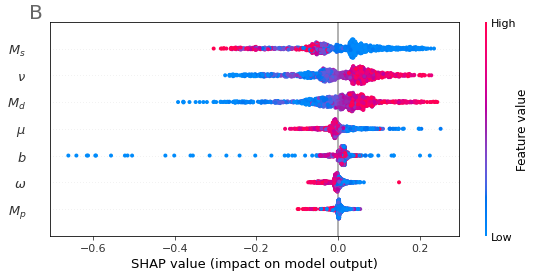

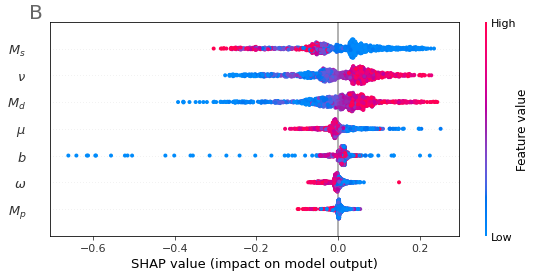

In [29]:
plt.close('all')

shap.plots.beeswarm(shap_values, plot_size=(WIDTH,HEIGHT), show=False)

f = plt.gcf()

ax = plt.gca()

f.patch.set_facecolor('white')


ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

labels=[
    r'$M_p$',
    r'$\omega$',
    r'$b$',
    r'$\mu$',
    r'$M_d$',
    r'$\nu$',
    # r'$Y$',
    r'$M_s$',
]

ax.set_yticklabels(labels)


f.tight_layout(rect=[0, 0, 1, 0.95])

plt.annotate(
    'B',
    (0.05, 0.9),
    xycoords='figure fraction',
    color=(0.4, 0.4, 0.4),
    size=20,
)

f

In [30]:
f.savefig('../figures/to_combine/app_ps_fig1_2.jpg', dpi=300) # , bbox_inches="tight"

Run this in `cmd`:
```
cd Documents\Python\PhD\poly2\polygenic2\figures\to_combine
magick montage app_ps_fig1_[1-2].jpg -tile x2 -geometry 1000x450+2+20 app_ps_fig1_.jpg
```

# Fig 6

In [31]:
cf = Config()

CONFIG
------
I0s = [0.00985703, 0.00985703, 0.00985703, 0.00985 ...
asymptote = None
betas = [0.00786542, 0.00786542, 0.00786542, 0.007 ...
decay_rate = None
doses = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1 ...
fungicide_mixture = False
host_on = None
k_b = 0.8431572316700577
k_mu = 9.44286788381916
l_b = 6.585357214619326
l_mu = 0.8089358816813786
mutation_proportion = 1.234375e-05
mutation_scale_fung = 0.0019836158401698102
mutation_scale_host = 0.0019836158401698102
n_k = 50
n_l = 50
n_years = 15
replace_cultivars = None
sprays = None



In [54]:
a = cf.k_mu*cf.k_b
b = cf.k_b

# init_dist = gamma_dist(cf.n_k, a, b)


# asymptote = 1

# #
# # * in trait space, get mean and variance

# tv = trait_vec(cf.n_k)
# # NB get_dist_var/mean needs init_dist to be shape (n_k, n_years)
# reshaped = init_dist.reshape((cf.n_k, 1))
# tv_var = get_dist_var(reshaped, tv)[0]
# tv_mean = get_dist_mean(reshaped, tv)[0]

# # NB max_effect = 1 - w + w * exp(-curv)
# #               = 1 - w + w * k
# max_effect_mean = 1 - asymptote + asymptote * tv_mean
# # max_effect_var = (asymptote**2) * tv_var

# ev = edge_values(10)
# dist_summary = gamma_dist(10, a, b)

max_effect_mean = (b/(b+1))**a

In [33]:
shap_values.values.min(), shap_values.values.max()

(-0.6605888, 0.25106078)

In [34]:
ymin = -0.70
ymax = 0.30

Wall time: 402 ms


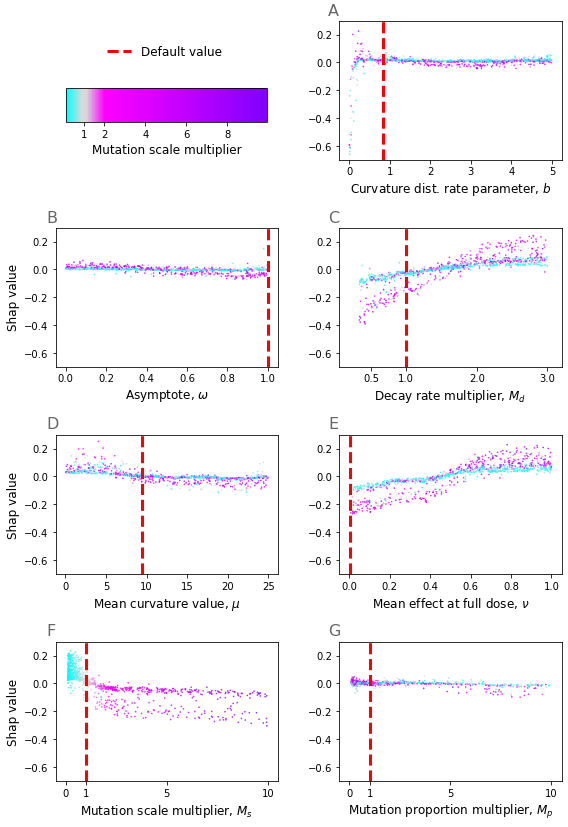

In [91]:
%%time

plt.close('all')

plt.rc('font', size=SMALL_FONT)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_FONT)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_FONT)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_FONT)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_FONT)  # fontsize of the figure title


f, ax = plt.subplots(4, 2, figsize=(8, 12))

alpha = 0.8
size = 0.4

# DATA


grey = (0.85, 0.85, 0.85)
blue1 = (0,1,1)
pink1 = (1,0,1)
pink2 = (0.5,0,1)

cvals  = [0.1, 0.9, 1.1, 2, 10]
colors = [blue1, grey, grey, pink1, pink2]

norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm, cvals), colors))
cm1 = LinearSegmentedColormap.from_list("", tuples)
cmap1 = ScalarMappable(cmap=cm1)


colors3 = cmap1.to_rgba(shap_values[:, 'm_scale'].data)

# A
# ax[0][0].scatter(
#     shap_values[:, "year"].data,
#     shap_values[:, "year"].values,
#     alpha=alpha, 
#     color=colors3,
#     # color=SHAP_BLUE,
#     s=size,
# )

# B
# ax[0][1].scatter(shap_values[:, "in_0p1_0p2"].data, shap_values[:, "in_0p1_0p2"].values,
#     alpha=alpha, 
#     color=colors1,
#     s=size)
ax[0][1].scatter(
    shap_values[:, "b"].data,
    shap_values[:, "b"].values,
    alpha=alpha, 
    color=colors3,
    s=size,
)

# C
ax[1][0].scatter(
    shap_values[:, "asymp"].data,
    shap_values[:, "asymp"].values,
    alpha=alpha, 
    color=colors3,
    s=size,
)

# D
ax[1][1].scatter(
    shap_values[:, "dec_rate"].data,
    shap_values[:, "dec_rate"].values,
    alpha=alpha, 
    color=colors3,
    s=size,
)

# E
ax[2][0].scatter(
    shap_values[:, "mu"].data,
    shap_values[:, "mu"].values,
    alpha=alpha, 
    color=colors3,
    s=size,
)

# F
ax[2][1].scatter(
    shap_values[:, "ME_mean"].data,
    shap_values[:, "ME_mean"].values,
    alpha=alpha, 
    color=colors3,
    s=size,
)



# ax[2][1].scatter(shap_values[:, "ME_var"].data, shap_values[:, "ME_var"].values,
#     alpha=alpha, 
#     color=colors1,
#     s=size)


# G
ax[3][0].scatter(
    shap_values[:, "m_scale"].data,
    shap_values[:, "m_scale"].values,
    alpha=alpha, 
    color=colors3,
    s=size,
)

# H
ax[3][1].scatter(
    shap_values[:, "m_prop"].data, 
    shap_values[:, "m_prop"].values,
    alpha=alpha, 
    color=colors3,
    s=size,
)




# LAYOUT

# A
# ax[0][0].set_xlabel(r'Year, $Y$')


# B
ax[0][1].set_xlabel(r'Curvature dist. rate parameter, $b$')
ax[0][1].axvline(cf.k_b, color='r', label='Default value', ls='--', lw=3)


# C
ax[1][0].set_xlabel(r'Asymptote, $\omega$')
ax[1][0].set_xlim([-0.05,1.05])
ax[1][0].axvline(1, color='r', ls='--', lw=3)


# D
ax[1][1].set_xlabel(r'Decay rate multiplier, $M_d$')
ax[1][1].set_xlim([0.05, 3.2])
ax[1][1].set_xticks([0.5, 1, 2, 3])
ax[1][1].axvline(1, color='r', ls='--', lw=3)

# E
ax[2][0].set_xlabel(r'Mean curvature value, $\mu$')
ax[2][0].axvline(cf.k_mu, color='r', ls='--', lw=3)


# F
ax[2][1].set_xlabel(r'Mean effect at full dose, $\nu$')
ax[2][1].set_xlim([-0.05,1.05])
ax[2][1].axvline(max_effect_mean, color='r', ls='--', lw=3)

# ax[2][1].set_xlabel('Effect at full dose, variance')
# ax[2][1].axvline(max_effect_var, color='r', ls='--', lw=3)

# G
ax[3][0].set_xlabel(r'Mutation scale multiplier, $M_s$')
ax[3][0].set_xlim([-0.5,10.5])
ax[3][0].set_xticks([0, 1, 5, 10])
ax[3][0].axvline(1, color='r', ls='--', lw=3)


# H
ax[3][1].set_xlabel(r'Mutation proportion multiplier, $M_p$')
ax[3][1].set_xlim([-0.5,10.5])
ax[3][1].set_xticks([0, 1, 5, 10])
ax[3][1].axvline(1, color='r', ls='--', lw=3)


ax[0][0].spines['top'].set_visible(False)
ax[0][0].spines['right'].set_visible(False)
ax[0][0].spines['left'].set_visible(False)
ax[0][0].spines['bottom'].set_visible(False)

ax[0][0].set_xticks([])
ax[0][0].set_yticks([])

for ii, jj in itertools.product(np.arange(4), np.arange(2)):    

    ax[ii][jj].set_ylim([ymin, ymax])
    
    if jj==0:
        if ii>0:
            ax[ii][jj].set_ylabel('Shap value')
    else:
        ax[ii][jj].set_ylabel('')

    
    





f.patch.set_facecolor('white')

f.align_ylabels()

plt.tight_layout(rect=[0, 0, 1, 0.95], h_pad=3, w_pad=3)


cax1 = plt.axes([0.12, 0.82, 0.35, 0.04])

plt.colorbar(
    cmap1,
    cax=cax1, 
    label='Mutation scale multiplier', 
    ticks=[1,2,4,6,8,10],
    orientation="horizontal",
)


letters = 'ABCDEFG'
labels = [''] + [letters[ii] for ii in range(7)]

get_corner_annotations_custom_labels(2, 4, 0.08, 0.94, 0.49, 0.2395, plt, labels)

ax[0][1].legend(
    loc=1,
    bbox_to_anchor=(-0.48, 0.9),
    framealpha=0,
)

# f

In [92]:
f.savefig('../figures/paper/app_ps_Y10_fig2.jpg', dpi=300, bbox_inches="tight")